In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data

In [3]:
df = pd.read_csv('healthy_lifestyle_city_2021.csv')
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,£1.92,20.40%,81.2,30.93,1434.0,7.44,422,1048,£34.90
1,Sydney,2,2636.0,£1.48,29.00%,82.1,26.86,1712.0,7.22,406,1103,£41.66
2,Vienna,3,1884.0,£1.94,20.10%,81.0,17.33,1501.0,7.29,132,1008,£25.74
3,Stockholm,4,1821.0,£1.72,20.60%,81.8,19.63,1452.0,7.35,129,598,£37.31
4,Copenhagen,5,1630.0,£2.19,19.70%,79.8,21.24,1380.0,7.64,154,523,£32.53


# Preparing data for analysis - converting values into correct formats

## Are there any NaN values?

In [6]:
df.isnull().values.any()

True

## Where are those NaN values?

In [11]:
df1 = df.loc[:, df.isna().any()]
df1

,Sunshine hours(City),Pollution(Index score) (City),Annual avg. hours worked
0,1858.0,30.93,1434.0
1,2636.0,26.86,1712.0
2,1884.0,17.33,1501.0
3,1821.0,19.63,1452.0
4,1630.0,21.24,1380.0
5,1662.0,13.08,1540.0
6,2769.0,NaN,1644.0
7,1626.0,39.41,1386.0
8,2591.0,65.19,1686.0
9,1938.0,24.26,1670.0


## Getting info about dtypes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


## Converting strings into number values

### Cost of bottled water to float

In [20]:
df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].str.lstrip('£')
df['Cost of a bottle of water(City)'] = pd.to_numeric(df['Cost of a bottle of water(City)'])
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,20.40%,81.2,30.93,1434.0,7.44,422,1048,£34.90
1,Sydney,2,2636.0,1.48,29.00%,82.1,26.86,1712.0,7.22,406,1103,£41.66
2,Vienna,3,1884.0,1.94,20.10%,81.0,17.33,1501.0,7.29,132,1008,£25.74
3,Stockholm,4,1821.0,1.72,20.60%,81.8,19.63,1452.0,7.35,129,598,£37.31
4,Copenhagen,5,1630.0,2.19,19.70%,79.8,21.24,1380.0,7.64,154,523,£32.53


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


### Converting Obesity levels(Country) from string to numeric

In [22]:
df['Obesity levels(Country)'] = df['Obesity levels(Country)'].str.rstrip('%')
df['Obesity levels(Country)'] = pd.to_numeric(df['Obesity levels(Country)'])
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,£34.90
1,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,£41.66
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,£25.74
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,£37.31
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,£32.53


### Converting Cost of a monthly gym membership(City) to numeric

In [23]:
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].str.lstrip('£')
df['Cost of a monthly gym membership(City)'] = pd.to_numeric(df['Cost of a monthly gym membership(City)'])
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


# Overall analysis of the dataframe

In [28]:
df.describe()

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
count,44.000000,43.000000,44.000000,44.00000,44.00000,43.000000,33.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,2245.860465,1.173409,21.92500,78.17500,51.122326,1672.909091,6.435000,213.977273,1443.113636,40.420000
std,12.845233,567.403719,0.718642,10.19567,5.30437,21.856190,179.626933,0.991202,127.190297,1388.803270,15.006457
min,1.000000,1405.000000,0.150000,3.90000,56.30000,13.080000,1380.000000,3.570000,23.000000,250.000000,16.070000
25%,11.750000,1798.500000,0.570000,19.50000,75.40000,34.355000,1540.000000,5.870000,125.250000,548.000000,31.310000
50%,22.500000,2066.000000,1.195000,22.30000,80.40000,52.640000,1686.000000,6.900000,189.500000,998.000000,37.330000
75%,33.250000,2629.000000,1.600000,29.00000,81.80000,66.630000,1779.000000,7.175000,288.250000,1674.250000,47.210000
max,44.000000,3542.000000,3.200000,36.20000,83.20000,91.740000,2137.000000,7.800000,585.000000,6417.000000,73.110000


## Top 5 minimum and maximum values for:

### Sunshine hours

In [47]:
df.sort_values(by='Sunshine hours(City)').head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
23,Taipei,24,1405.0,0.57,6.2,75.4,49.32,NaN,5.12,134,717,34.76
27,Dublin,28,1453.0,1.40,25.3,80.5,40.07,1772.0,7.09,159,659,37.35
32,Brussels,33,1546.0,2.11,22.1,80.4,62.67,1583.0,6.86,55,988,25.34
36,Zurich,37,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69,538,73.11
7,Berlin,8,1626.0,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11


In [48]:
df.sort_values(by='Sunshine hours(City)', ascending=False).head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
22,Cairo,23,3542.0,0.16,32.0,70.7,91.74,NaN,4.15,323,250,23.25
20,Tel Aviv,21,3311.0,1.63,26.1,81.9,47.28,1898.0,7.12,139,420,58.31
24,Los Angeles,25,3254.0,1.52,36.2,78.8,66.07,1779.0,6.94,223,1439,32.00
38,Johannesburg,39,3124.0,0.59,28.3,56.3,61.83,NaN,4.81,194,492,24.28
33,San Francisco,34,3062.0,1.60,36.2,78.8,47.36,1779.0,6.94,242,1031,65.13


### Cost of bottled water

In [49]:
df.sort_values(by='Cost of a bottle of water(City)').head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
21,Istanbul,22,2218.0,0.15,32.1,74.7,69.49,1832.0,5.13,419,934,16.97
25,Mumbai,26,2584.0,0.15,3.9,67.3,82.84,NaN,3.57,187,1183,19.54
22,Cairo,23,3542.0,0.16,32.0,70.7,91.74,NaN,4.15,323,250,23.25
16,Jakarta,17,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94
12,Bangkok,13,2624.0,0.22,10.0,74.1,76.64,NaN,5.99,377,1796,50.03


In [50]:
df.sort_values(by='Cost of a bottle of water(City)', ascending=False).head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
36,Zurich,37,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69,538,73.11
19,Geneva,20,NaN,2.62,19.5,82.6,27.25,1557.0,7.56,44,444,70.00
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53
32,Brussels,33,1546.0,2.11,22.1,80.4,62.67,1583.0,6.86,55,988,25.34
34,Paris,35,1662.0,1.95,21.6,81.8,65.10,1505.0,6.66,331,4363,35.93


### Life expectancy

In [56]:
df.sort_values(by='Life expectancy(years) (Country)').head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
38,Johannesburg,39,3124.0,0.59,28.3,56.3,61.83,NaN,4.81,194,492,24.28
25,Mumbai,26,2584.0,0.15,3.9,67.3,82.84,NaN,3.57,187,1183,19.54
16,Jakarta,17,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94
42,Moscow,43,1901.0,0.41,23.1,69.5,57.63,1965.0,5.54,322,3206,31.40
22,Cairo,23,3542.0,0.16,32.0,70.7,91.74,NaN,4.15,323,250,23.25


In [57]:
df.sort_values(by='Life expectancy(years) (Country)', ascending=False).head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
28,Tokyo,29,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387,5802,70.82
6,Fukuoka,7,2769.0,0.78,4.3,83.2,NaN,1644.0,5.87,35,539,55.87
39,Milan,40,1915.0,1.15,19.9,82.7,67.19,1718.0,6.38,110,2396,53.49
36,Zurich,37,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69,538,73.11
19,Geneva,20,NaN,2.62,19.5,82.6,27.25,1557.0,7.56,44,444,70.00


### Pollution

In [58]:
df.sort_values(by='Pollution(Index score) (City)').head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
5,Helsinki,6,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113,309,35.23
36,Zurich,37,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69,538,73.11
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53


In [59]:
df.sort_values(by='Pollution(Index score) (City)', ascending=False).head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
22,Cairo,23,3542.0,0.16,32.0,70.7,91.74,NaN,4.15,323,250,23.25
11,Beijing,12,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62
16,Jakarta,17,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94
25,Mumbai,26,2584.0,0.15,3.9,67.3,82.84,NaN,3.57,187,1183,19.54
43,Mexico City,44,2555.0,0.45,28.9,76.4,82.78,2137.0,6.46,192,1313,41.99


### Happiness

In [60]:
df.sort_values(by='Happiness levels(Country)').head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
25,Mumbai,26,2584.0,0.15,3.9,67.3,82.84,NaN,3.57,187,1183,19.54
22,Cairo,23,3542.0,0.16,32.0,70.7,91.74,NaN,4.15,323,250,23.25
38,Johannesburg,39,3124.0,0.59,28.3,56.3,61.83,NaN,4.81,194,492,24.28
11,Beijing,12,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62
31,Shanghai,32,1776.0,0.29,6.2,75.4,77.40,NaN,5.12,108,346,44.68


In [61]:
df.sort_values(by='Happiness levels(Country)', ascending=False).head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
5,Helsinki,6,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113,309,35.23
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53
36,Zurich,37,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69,538,73.11
19,Geneva,20,NaN,2.62,19.5,82.6,27.25,1557.0,7.56,44,444,70.00
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90


# Adding columns and creating graphs


## "Luxury coefficient"

In [98]:
df['Luxury coefficient'] = df['Cost of a monthly gym membership(City)']/df['Cost of a bottle of water(City)']
df.sort_values(by='Luxury coefficient', ascending=False).head(15)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient
12,Bangkok,13,2624.0,0.22,10.0,74.1,76.64,NaN,5.99,377,1796,50.03,227.409092
31,Shanghai,32,1776.0,0.29,6.2,75.4,77.40,NaN,5.12,108,346,44.68,154.068970
11,Beijing,12,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62,148.538467
22,Cairo,23,3542.0,0.16,32.0,70.7,91.74,NaN,4.15,323,250,23.25,145.312503
16,Jakarta,17,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94,142.571433
25,Mumbai,26,2584.0,0.15,3.9,67.3,82.84,NaN,3.57,187,1183,19.54,130.266661
21,Istanbul,22,2218.0,0.15,32.1,74.7,69.49,1832.0,5.13,419,934,16.97,113.133329
43,Mexico City,44,2555.0,0.45,28.9,76.4,82.78,2137.0,6.46,192,1313,41.99,93.311114
28,Tokyo,29,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387,5802,70.82,93.184212
30,Hong Kong,31,1836.0,0.75,6.2,75.4,67.46,NaN,5.51,277,1257,57.95,77.266667


In [95]:
df['Luxury coefficient'].describe()

count     44.000000
mean      56.122391
std       48.547465
min       12.009479
25%       23.334330
50%       36.147867
75%       73.845494
max      227.409091
Name: Luxury coefficient, dtype: float64

### Brussels has the lowest Luxury coefficient

In [105]:
df.sort_values(by='Luxury coefficient').head(15)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient
32,Brussels,33,1546.0,2.11,22.1,80.4,62.67,1583.0,6.86,55,988,25.34,12.009479
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74,13.268041
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53,14.853881
7,Berlin,8,1626.0,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11,16.845162
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90,18.177084
34,Paris,35,1662.0,1.95,21.6,81.8,65.10,1505.0,6.66,331,4363,35.93,18.425641
18,Frankfurt,19,1662.0,1.95,22.3,80.6,37.78,1386.0,7.07,23,551,39.01,20.005128
24,Los Angeles,25,3254.0,1.52,36.2,78.8,66.07,1779.0,6.94,223,1439,32.00,21.052632
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31,21.691860
5,Helsinki,6,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113,309,35.23,22.018750


## Let's see how difference between classes is behaving with respect to standard of life and development of the country.

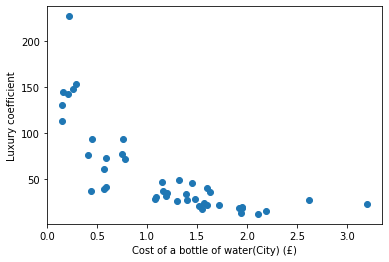

In [69]:
plt.scatter(df['Cost of a bottle of water(City)'],df['Luxury coefficient'])
plt.xlabel('Cost of a bottle of water(City) (£)')
plt.ylabel('Luxury coefficient')
plt.savefig("Cost of water vs. Luxury coefficient.png")
plt.show()

## Obesity

### In what relationship is obesity level with lifespan? 

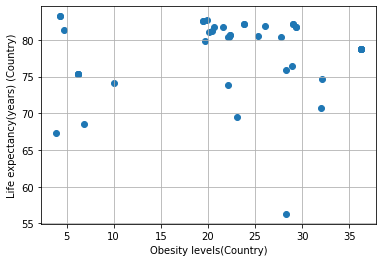

In [131]:
plt.scatter(df['Obesity levels(Country)'],df['Life expectancy(years) (Country)'])
plt.xlabel('Obesity levels(Country)')
plt.ylabel('Life expectancy(years) (Country)')
plt.grid()
plt.show()

### Let's see which cities lay in the left side of the graph and which ones are not in the upper right region.

#### Left side (22.72%)

In [132]:
filter1 = df.loc[(df['Obesity levels(Country)']<15) & (df['Obesity levels(Country)']<30)]
filter1.sort_values(by='Life expectancy(years) (Country)', ascending=False).head(10)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient,month of water / month of gym
6,Fukuoka,7,2769.0,0.78,4.3,83.2,NaN,1644.0,5.87,35,539,55.87,71.628208,0.418829
28,Tokyo,29,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387,5802,70.82,93.184212,0.321943
17,Seoul,18,2066.0,0.59,4.7,81.3,57.82,1967.0,5.87,144,389,43.03,72.932207,0.411341
11,Beijing,12,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62,148.538467,0.201968
23,Taipei,24,1405.0,0.57,6.2,75.4,49.32,NaN,5.12,134,717,34.76,60.982457,0.491945
30,Hong Kong,31,1836.0,0.75,6.2,75.4,67.46,NaN,5.51,277,1257,57.95,77.266667,0.388266
31,Shanghai,32,1776.0,0.29,6.2,75.4,77.40,NaN,5.12,108,346,44.68,154.068970,0.194718
12,Bangkok,13,2624.0,0.22,10.0,74.1,76.64,NaN,5.99,377,1796,50.03,227.409092,0.131921
16,Jakarta,17,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94,142.571433,0.210421
25,Mumbai,26,2584.0,0.15,3.9,67.3,82.84,NaN,3.57,187,1183,19.54,130.266661,0.230297


#### Not in the upper right (15.90%)

In [88]:
filter2 = df.loc[(df['Obesity levels(Country)']>15) & (df['Life expectancy(years) (Country)']<78)]
filter2.sort_values(by='Life expectancy(years) (Country)', ascending=False).head(7)


,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient
43,Mexico City,44,2555.0,0.45,28.9,76.4,82.78,2137.0,6.46,192,1313,41.99,93.311111
13,Buenos Aires,14,2525.0,0.57,28.3,75.9,52.64,NaN,5.97,246,1435,22.45,39.385965
21,Istanbul,22,2218.0,0.15,32.1,74.7,69.49,1832.0,5.13,419,934,16.97,113.133333
35,Sao Paulo,36,2003.0,0.44,22.1,73.9,79.78,NaN,6.37,158,3355,16.07,36.522727
22,Cairo,23,3542.0,0.16,32.0,70.7,91.74,NaN,4.15,323,250,23.25,145.312500
42,Moscow,43,1901.0,0.41,23.1,69.5,57.63,1965.0,5.54,322,3206,31.40,76.585366
38,Johannesburg,39,3124.0,0.59,28.3,56.3,61.83,NaN,4.81,194,492,24.28,41.152542


#### In the upper right (61.38%)

In [89]:
filter3 = df.loc[(df['Obesity levels(Country)']>15) & (df['Life expectancy(years) (Country)']>78)]
filter3.sort_values(by='Life expectancy(years) (Country)', ascending=False).head(27)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient
39,Milan,40,1915.0,1.15,19.9,82.7,67.19,1718.0,6.38,110,2396,53.49,46.513043
19,Geneva,20,NaN,2.62,19.5,82.6,27.25,1557.0,7.56,44,444,70.00,26.717557
36,Zurich,37,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69,538,73.11,22.846875
8,Barcelona,9,2591.0,1.19,23.8,82.2,65.19,1686.0,6.40,585,2344,37.80,31.764706
15,Madrid,16,2769.0,1.30,23.8,82.2,52.68,1686.0,6.40,216,2491,34.54,26.569231
1,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66,28.148649
10,Melbourne,11,2363.0,1.57,29.0,82.1,25.90,1712.0,7.22,243,813,36.89,23.496815
20,Tel Aviv,21,3311.0,1.63,26.1,81.9,47.28,1898.0,7.12,139,420,58.31,35.773006
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31,21.691860
34,Paris,35,1662.0,1.95,21.6,81.8,65.10,1505.0,6.66,331,4363,35.93,18.425641


## Let's see relationship between cost of monthly gym membership and cost of 30 days worth of water.

### Add column month of water/month of gym.

In [106]:
df['month of water / month of gym'] = 30 * df['Cost of a bottle of water(City)'] / df['Cost of a monthly gym membership(City)']
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient,month of water / month of gym
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90,18.177084,1.650430
1,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66,28.148648,1.065771
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74,13.268041,2.261072
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31,21.691860,1.383007
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53,14.853881,2.019674


### Let's now see relationship between obesity levels and lifestandard that is now expressed as ratio between cost of monthly gym membership and 30 days of water (buying one per day).

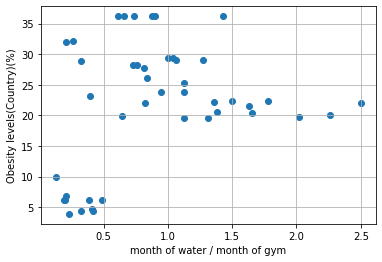

In [110]:
plt.scatter(df['month of water / month of gym'],df['Obesity levels(Country)'])
plt.xlabel('month of water / month of gym')
plt.ylabel('Obesity levels(Country)(%)')
plt.grid()
plt.show()

### What we were trying to see is whether gym is affordable and viewed as desirable activity.

### Filltering out the smaller group in the bottom left corner of the graph:

In [109]:
smaller_group = df.loc[(df['month of water / month of gym']<=0.75) & (df['Obesity levels(Country)']<15)]
smaller_group

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient,month of water / month of gym
6,Fukuoka,7,2769.0,0.78,4.3,83.2,NaN,1644.0,5.87,35,539,55.87,71.628208,0.418829
11,Beijing,12,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62,148.538467,0.201968
12,Bangkok,13,2624.0,0.22,10.0,74.1,76.64,NaN,5.99,377,1796,50.03,227.409092,0.131921
16,Jakarta,17,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94,142.571433,0.210421
17,Seoul,18,2066.0,0.59,4.7,81.3,57.82,1967.0,5.87,144,389,43.03,72.932207,0.411341
23,Taipei,24,1405.0,0.57,6.2,75.4,49.32,NaN,5.12,134,717,34.76,60.982457,0.491945
25,Mumbai,26,2584.0,0.15,3.9,67.3,82.84,NaN,3.57,187,1183,19.54,130.266661,0.230297
28,Tokyo,29,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387,5802,70.82,93.184212,0.321943
30,Hong Kong,31,1836.0,0.75,6.2,75.4,67.46,NaN,5.51,277,1257,57.95,77.266667,0.388266
31,Shanghai,32,1776.0,0.29,6.2,75.4,77.40,NaN,5.12,108,346,44.68,154.068970,0.194718


## Obesity - A lot of same parameters.

### We can see that for some reason, countries that have the same obesity level have also the same annual avg. working hours, happiness level, life expectancy and around the same price of bottled water.

In [119]:
obesity1 = df.loc[df['Obesity levels(Country)']==36.2]
obesity1

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient,month of water / month of gym
24,Los Angeles,25,3254.0,1.52,36.2,78.8,66.07,1779.0,6.94,223,1439,32.00,21.052632,1.425000
26,Boston,27,2634.0,1.39,36.2,78.8,27.03,1779.0,6.94,88,588,46.27,33.287770,0.901232
29,Chicago,30,2508.0,1.20,36.2,78.8,43.33,1779.0,6.94,171,1320,41.14,34.283332,0.875061
33,San Francisco,34,3062.0,1.60,36.2,78.8,47.36,1779.0,6.94,242,1031,65.13,40.706249,0.736988
40,"Washington, D.C.",41,2528.0,1.45,36.2,78.8,39.18,1779.0,6.94,83,744,65.99,45.510343,0.659191
41,New York,42,2535.0,1.32,36.2,78.8,57.36,1779.0,6.94,359,3081,64.66,48.984847,0.612434


In [120]:
obesity2 = df.loc[df['Obesity levels(Country)']==6.2]
obesity2

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient,month of water / month of gym
11,Beijing,12,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62,148.538467,0.201968
23,Taipei,24,1405.0,0.57,6.2,75.4,49.32,NaN,5.12,134,717,34.76,60.982457,0.491945
30,Hong Kong,31,1836.0,0.75,6.2,75.4,67.46,NaN,5.51,277,1257,57.95,77.266667,0.388266
31,Shanghai,32,1776.0,0.29,6.2,75.4,77.40,NaN,5.12,108,346,44.68,154.068970,0.194718


In [121]:
obesity3 = df.loc[df['Obesity levels(Country)']==4.3]
obesity3

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient,month of water / month of gym
6,Fukuoka,7,2769.0,0.78,4.3,83.2,NaN,1644.0,5.87,35,539,55.87,71.628208,0.418829
28,Tokyo,29,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387,5802,70.82,93.184212,0.321943


### It is know that viewing light affects human feeding behaviour. There is an aggregation of neurons in hypotalamus (arcuate nucleus of hypothalamus) that drives our feeding behaviour and feelings of being safe. So, let's check out the relationship between obesity levels and sunshine hours.

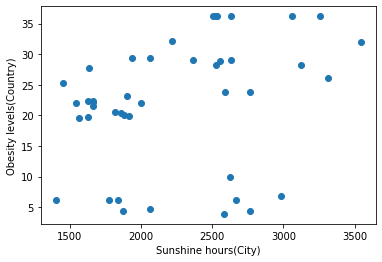

In [123]:
plt.scatter(df['Sunshine hours(City)'],df['Obesity levels(Country)'])
plt.xlabel('Sunshine hours(City)')
plt.ylabel('Obesity levels(Country)')
plt.show()

### We would be expecting different result, so this came as a surprise. Let's see which cities lay at the bottom of the graph.

In [124]:
obesity4 = df.loc[df['Obesity levels(Country)']<15]
obesity4

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient,month of water / month of gym
6,Fukuoka,7,2769.0,0.78,4.3,83.2,NaN,1644.0,5.87,35,539,55.87,71.628208,0.418829
11,Beijing,12,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62,148.538467,0.201968
12,Bangkok,13,2624.0,0.22,10.0,74.1,76.64,NaN,5.99,377,1796,50.03,227.409092,0.131921
16,Jakarta,17,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94,142.571433,0.210421
17,Seoul,18,2066.0,0.59,4.7,81.3,57.82,1967.0,5.87,144,389,43.03,72.932207,0.411341
23,Taipei,24,1405.0,0.57,6.2,75.4,49.32,NaN,5.12,134,717,34.76,60.982457,0.491945
25,Mumbai,26,2584.0,0.15,3.9,67.3,82.84,NaN,3.57,187,1183,19.54,130.266661,0.230297
28,Tokyo,29,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387,5802,70.82,93.184212,0.321943
30,Hong Kong,31,1836.0,0.75,6.2,75.4,67.46,NaN,5.51,277,1257,57.95,77.266667,0.388266
31,Shanghai,32,1776.0,0.29,6.2,75.4,77.40,NaN,5.12,108,346,44.68,154.068970,0.194718


### We see that we can split them in three groups

## Relationship between pollution and life expectancy.

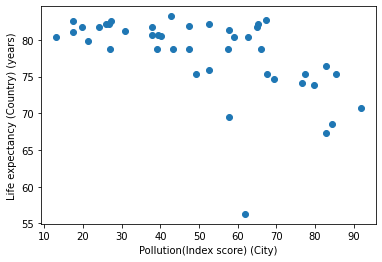

In [122]:
plt.scatter(df['Pollution(Index score) (City)'],df['Life expectancy(years) (Country)'])
plt.xlabel('Pollution(Index score) (City)')
plt.ylabel('Life expectancy (Country) (years)')
plt.show()

### Point that deviates a lot from the rest is Johannesburg.

## Relationship between cost of bottled water and pollution.

### Assumption: the more expensive bottled water the better the standard of life, i.e. more developed country.

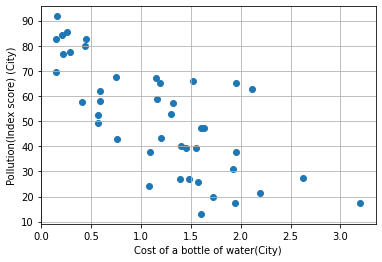

In [129]:
plt.scatter(df['Cost of a bottle of water(City)'],df['Pollution(Index score) (City)'])
plt.xlabel('Cost of a bottle of water(City)')
plt.ylabel('Pollution(Index score) (City)')
plt.grid()
plt.show()

### Conclusion: the better standard of life the less polluted the country. (Or maybe, more developed countries move their companies to countries that are less developed and will work for less money - cheap labour and thus countries with lower life standards are more polluted)

### Points that somewhat deviate from previous graph:

In [130]:
df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].astype('float32')
filtered = df.loc[(df['Pollution(Index score) (City)']>=60) & (df['Pollution(Index score) (City)']<=70) & (df['Cost of a bottle of water(City)']>=1.5) & (df['Cost of a bottle of water(City)']<2.5)]
filtered

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Luxury coefficient,month of water / month of gym
24,Los Angeles,25,3254.0,1.52,36.2,78.8,66.07,1779.0,6.94,223,1439,32.00,21.052632,1.425000
32,Brussels,33,1546.0,2.11,22.1,80.4,62.67,1583.0,6.86,55,988,25.34,12.009479,2.498027
34,Paris,35,1662.0,1.95,21.6,81.8,65.10,1505.0,6.66,331,4363,35.93,18.425641,1.628166
